In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


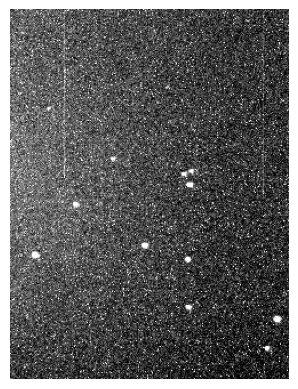

In [ ]:
# PIL (Python Imaging Library): Used for opening, manipulating, and saving images.
# re (Regular Expressions): A module for searching and manipulating strings using regex patterns.
from PIL import Image
import numpy as np
import re

def txt_to_image(file_path):

    with open(file_path, 'r') as file:
        lines = file.readlines()

    height, width, channels = map(int, lines[0].strip().split())

    pixels = []
    for i, line in enumerate(lines[1:], start=2):

        clean_line = re.sub(r'[(),]', '', line.strip())
        pixels.extend(map(int, clean_line.split()))

    pixel_array = np.array(pixels, dtype=np.uint8)

    pixel_array = pixel_array.reshape((height, width, channels))

    image = Image.fromarray(pixel_array)
    return image


file_path = "input1.txt"
image = txt_to_image(file_path)
if image:
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    image.save("sky_image.png")


The first line of the text file contains the dimensions of the image: height, width, and the number of color channels (e.g., 3 for RGB).

strip() removes any leading or trailing whitespace from the line, and split() divides it into separate strings based on spaces.

map(int, ...) converts these string values into integers, assigning them to height, width, and channels.
Initializes an empty list called pixels to hold pixel values.
Loops through each line of the file starting from the second line (lines[1:]), as the first line contains dimensions.

Regex Substitution: re.sub(r'[(),]', '', line.strip()) removes unwanted characters like parentheses (, ), and commas , from each line to clean it up.
map(int, clean_line.split()) converts the cleaned string of pixel values into integers and adds them to the pixels list using extend().

Converts the pixels list into a NumPy array, specifying the data type as uint8 (unsigned 8-bit integer), which is suitable for pixel values ranging from 0 to 255.

Converts the reshaped NumPy array into a PIL Image object. This step allows us to manipulate and save the image.
Specifies the path of the text file (input1.txt) that contains the image data.

Calls the txt_to_image function to create the image.
Saves the created image as a PNG file named sky_image.png.

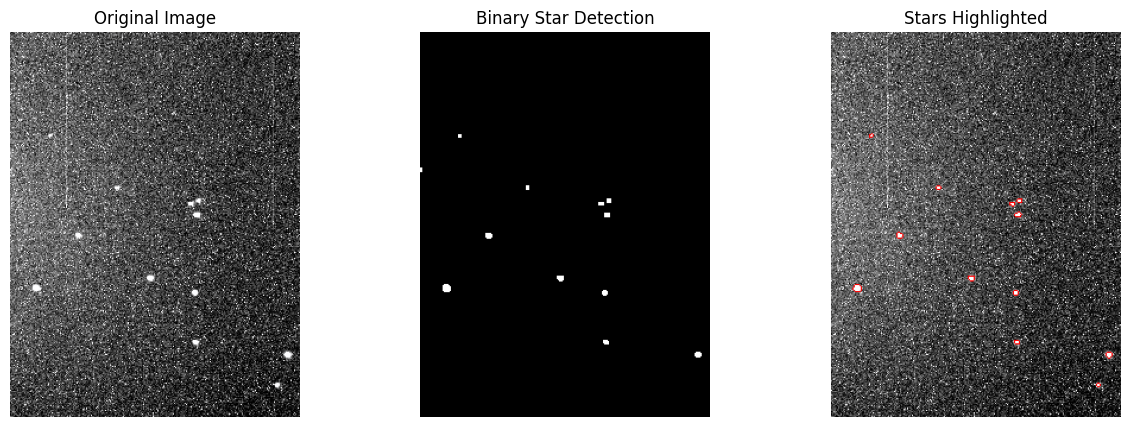

Number of stars detected: 12


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# This function process_sky_image takes an image and parameters for processing, including a blur kernel for smoothing and minimum/maximum contour area for star detection.
def process_sky_image(image, blur_kernel=(5, 5), min_contour_area=6, max_contour_area=200):

    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

    blurred_image = cv2.GaussianBlur(gray_image, blur_kernel, 0)

    clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(blurred_image)

    _, thresholded_image = cv2.threshold(enhanced_image, 195, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3, 3), np.uint8)
    clean_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, kernel)

    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    star_contours = [cnt for cnt in contours if min_contour_area < cv2.contourArea(cnt) < max_contour_area]
    # For each contour that represents a star, this calculates its center (centroid) using image moments, which helps to determine the precise location of each star.
    star_positions = []
    for contour in star_contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Avoid division by zero
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            star_positions.append((cx, cy))

    result_image = np.array(image).copy()
    cv2.drawContours(result_image, star_contours, -1, (255, 0, 0), 1)

    return result_image, clean_image, star_contours, star_positions

file_path = "input1.txt"
image = txt_to_image(file_path)
if image:
    processed_image, binary_stars, star_contours, star_positions = process_sky_image(image)

    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    # Binary Image
    plt.subplot(1, 3, 2)
    plt.imshow(binary_stars, cmap='gray')
    plt.title("Binary Star Detection")
    plt.axis('off')

    # Processed Image with Stars Highlighted
    plt.subplot(1, 3, 3)
    plt.imshow(processed_image)
    plt.title("Stars Highlighted")
    plt.axis('off')

    plt.show()

    print(f"Number of stars detected: {len(star_contours)}")


Converts the input image from RGB (color) to grayscale. This simplifies the image and helps focus on intensity (brightness) rather than color.

GaussianBlur: A smoothing technique that reduces noise and detail in the image. The blur_kernel parameter specifies the size of the kernel (in this case,
5
×
5
5×5). The larger the kernel, the more blurring occurs.

CLAHE: Enhances the contrast of the image in localized areas. The clipLimit controls contrast enhancement, and tileGridSize defines the size of the grid for the local histogram. This helps to bring out the features of stars more effectively.

Thresholding: Converts the grayscale image into a binary image (black and white). All pixels with a value greater than 195 become white (255), and all others become black (0). This helps isolate bright objects (like stars) from the background.

Creates a small
3
×
3
3×3 kernel of ones (used for structuring).
MORPH_OPEN: Removes small noise (artifacts) from the binary image, which helps in cleaning up the image and isolating the stars better.

findContours: Detects the outlines (contours) of the white regions in the binary image.
Filters the contours to only include those that have an area between min_contour_area and max_contour_area. This helps to eliminate noise and focuses on contours that likely correspond to stars.


Draw Contours on the Result Image:
Creates a copy of the original image and draws the detected star contours on it in red. The -1 indicates that all contours should be drawn, and the thickness is set to 1 pixel.



In [ ]:
for index, position in enumerate(star_positions):
        print(f"Star {index + 1}: Position (x={position[0]}, y={position[1]})")

Star 1: Position (x=224, y=296)
Star 2: Position (x=233, y=271)
Star 3: Position (x=156, y=260)
Star 4: Position (x=155, y=219)
Star 5: Position (x=21, y=215)
Star 6: Position (x=117, y=206)
Star 7: Position (x=57, y=170)
Star 8: Position (x=156, y=153)
Star 9: Position (x=152, y=144)
Star 10: Position (x=158, y=141)
Star 11: Position (x=90, y=130)
Star 12: Position (x=33, y=86)
